### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns= None
pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("SI.csv")

In [3]:
df.head()

Borough  Block  Lot   CD  CT2010  CB2010  SchoolDist  Council  ZipCode  \
0      SI      1   10  501     3.0  2000.0        31.0     49.0  10301.0   
1      SI      1   17  501     3.0     NaN        31.0     49.0  10301.0   
2      SI      1   18  501     3.0     NaN        31.0     49.0  10301.0   
3      SI      1   19  501     3.0     NaN        31.0     49.0  10301.0   
4      SI      1   21  501     3.0     NaN        31.0     49.0  10301.0   

  FireComp  PolicePrct  HealthCenterDistrict  HealthArea  SanitBoro  \
0     L078       120.0                  51.0       500.0        5.0   
1     L078       120.0                  51.0       500.0        NaN   
2     L078       120.0                  51.0       500.0        NaN   
3     L078       120.0                  51.0       500.0        NaN   
4     L078       120.0                  51.0       500.0        NaN   

   SanitDistrict SanitSub         Address ZoneDist1 ZoneDist2 ZoneDist3  \
0            1.0       2C  139 BAY STREET      C4-2       NaN       NaN   
1            NaN      NaN      BAY STREET      C4-2       NaN       NaN   
2            NaN      NaN      BAY STREET      C4-2       NaN       NaN   
3            NaN      NaN      BAY STREET      C4-2       NaN       NaN   
4            NaN      NaN      BAY STREET      C4-2       NaN       NaN   

  ZoneDist4 Overlay1 Overlay2 SPDist1 SPDist2  SPDist3  LtdHeight SplitZone  \
0       NaN      NaN      NaN      SG     NaN      NaN        NaN         N   
1       NaN      NaN      NaN      SG     NaN      NaN        NaN         N   
2       NaN      NaN      NaN      SG     NaN      NaN        NaN         N   
3       NaN      NaN      NaN      SG     NaN      NaN        NaN         N   
4       NaN      NaN      NaN      SG     NaN      NaN        NaN         N   

  BldgClass  LandUse  Easements OwnerType              OwnerName  LotArea  \
0        E1      6.0          0       NaN  139 BAY POINTE PROPER     5716   
1        V1     11.0          0       NaN  139 BAY POINTE PROPER      780   
2        V1     11.0          0       NaN  139 BAY POINTE PROPER      520   
3        V1     11.0          0       NaN  139 BAY STREET REALTY      278   
4        V1     11.0          0         P               K MANDEL     6302   

   BldgArea  ComArea  ResArea  OfficeArea  RetailArea  GarageArea  StrgeArea  \
0     18965    18965        0           0        6965           0      12000   
1         0        0        0           0           0           0          0   
2         0        0        0           0           0           0          0   
3         0        0        0           0           0           0          0   
4         0        0        0           0           0           0          0   

   FactryArea  OtherArea  AreaSource  NumBldgs  NumFloors  UnitsRes  \
0           0          0           2         1        4.0         0   
1           0          0           4         0        0.0         0   
2           0          0           4         0        0.0         0   
3           0          0           4         0        0.0         0   
4           0          0           4         0        0.0         0   

   UnitsTotal  LotFront  LotDepth  BldgFront  BldgDepth  Ext  ProxCode  \
0           1    112.58      84.0      100.0       50.0  NaN       1.0   
1           0     26.00      35.0        0.0        0.0  NaN       0.0   
2           0     26.00      25.0        0.0        0.0  NaN       0.0   
3           0     39.00      15.0        0.0        0.0  NaN       0.0   
4           0     75.00      82.0        0.0        0.0  NaN       0.0   

  IrrLotCode  LotType  BsmtCode  AssessLand  AssessTot  ExemptLand  ExemptTot  \
0          Y      5.0       0.0      167400     670950           0          0   
1          Y      5.0       5.0       13950      13950           0          0   
2          Y      5.0       5.0        9450       9450           0          0   
3          Y      5.0       5.0         450        4

In [4]:
df = df[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
         'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
         'ZipCode', 'YCoord', 'XCoord']]

In [5]:
df.head()

Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  Lot  \
0  139 BAY STREET     18965       50.0      3.32      3.4       4.8   10   
1      BAY STREET         0        0.0      0.00      3.4       4.8   17   
2      BAY STREET         0        0.0      0.00      3.4       4.8   18   
3      BAY STREET         0        0.0      0.00      3.4       4.8   19   
4      BAY STREET         0        0.0      0.00      3.4       4.8   21   

   LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0     5716      84.0         1        4.0           0        0      2.43   
1      780      35.0         0        0.0           0        0      2.43   
2      520      25.0         0        0.0           0        0      2.43   
3      278      15.0         0        0.0           0        0      2.43   
4     6302      82.0         0        0.0           0        0      2.43   

   RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  
0        6965       1884        2000  10301.0  171951.0  963297.0  
1           0          0           0  10301.0       NaN       NaN  
2           0          0           0  10301.0       NaN       NaN  
3           0          0           0  10301.0       NaN       NaN  
4           0          0           0  10301.0       NaN       NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124493 entries, 0 to 124492
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Address     124456 non-null  object 
 1   BldgArea    124493 non-null  int64  
 2   BldgDepth   124493 non-null  float64
 3   BuiltFAR    124493 non-null  float64
 4   CommFAR     124493 non-null  float64
 5   FacilFAR    124493 non-null  float64
 6   Lot         124493 non-null  int64  
 7   LotArea     124493 non-null  int64  
 8   LotDepth    124493 non-null  float64
 9   NumBldgs    124493 non-null  int64  
 10  NumFloors   124493 non-null  float64
 11  OfficeArea  124493 non-null  int64  
 12  ResArea     124493 non-null  int64  
 13  ResidFAR    124493 non-null  float64
 14  RetailArea  124493 non-null  int64  
 15  YearBuilt   124493 non-null  int64  
 16  YearAlter1  124493 non-null  int64  
 17  ZipCode     122717 non-null  float64
 18  YCoord      116373 non-null  float64
 19  XC

In [7]:
df.describe(include='all')

Address       BldgArea      BldgDepth       BuiltFAR  \
count            124456  124493.000000  124493.000000  124493.000000   
unique           117259            NaN            NaN            NaN   
top     HYLAN BOULEVARD            NaN            NaN            NaN   
freq                174            NaN            NaN            NaN   
mean                NaN    2295.453736      37.222044       0.508726   
std                 NaN   11588.813036      24.937281       0.471746   
min                 NaN       0.000000       0.000000       0.000000   
25%                 NaN    1172.000000      28.000000       0.280000   
50%                 NaN    1528.000000      40.000000       0.470000   
75%                 NaN    2132.000000      46.000000       0.610000   
max                 NaN  970000.000000    5020.000000      88.550000   

              CommFAR       FacilFAR            Lot       LotArea  \
count   124493.000000  124493.000000  124493.000000  1.244930e+05   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean         0.048325       1.025791      92.693975  1.069042e+04   
std          0.315721       0.357364     319.213635  1.877781e+05   
min          0.000000       0.000000       1.000000  0.000000e+00   
25%          0.000000       1.000000      22.000000  2.500000e+03   
50%          0.000000       1.000000      49.000000  3.920000e+03   
75%          0.000000       1.000000      98.000000  5.045000e+03   
max          3.400000       4.800000    9018.000000  3.185000e+07   

             LotDepth       NumBldgs      NumFloors     OfficeArea  \
count   124493.000000  124493.000000  124493.000000  124493.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       110.576443       1.148723       1.823488     100.937362   
std        103.445063       2.402879       0.889205    3100.104682   
min          0.000000       0.000000       0.000000       0.000000   
25%         95.000000       1.000000       1.500000       0.000000   
50%        100.000000       1.000000       2.000000       0.000000   
75%        109.830000       1.000000       2.000000       0.000000   
max       9619.000000     417.000000     114.000000  418012.000000   

              ResArea       ResidFAR     RetailArea      YearBuilt  \
count   124493.000000  124493.000000  124493.000000  124493.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      1745.234857       0.580781     115.989718    1801.308017   
std       6520.480574       0.184247    4012.050013     545.177529   
min          0.000000       0.000000       0.000000       0.000000   
25%       1095.000000       0.600000       0.000000    1930.000000   
50%       1408.000000       0.600000       0.000000    1970.000000   
75%       1984.000000       0.600000       0.000000    1988.000000   
max     654030.000000       3.000000  940048.000000    2018.000000   

           YearAlter1        ZipCode         YCoord         XCoord  
count   124493.000000  122717.000000  116373.000000  116373.000000  
unique            NaN            NaN            NaN            NaN  
top               NaN            NaN            NaN            NaN  
freq              NaN            NaN            NaN            NaN  
mean       103.276690   10308.062836  151849.762875  945109.053294  
std        442.983524       4.104633   13515.939714   12341.696118  
min          0.000000   10301.000000  120308.000000  913123.000000  
25%          0.000000   10305.000000  140587.000000  937836.000000  
50%          0.0000

In [8]:
df.shape

(124493, 20)

In [9]:
df.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')

### Replace zero value with NaNs

In [10]:
df['Address'].value_counts()

HYLAN BOULEVARD                 174
AMBOY ROAD                      158
RICHMOND TERRACE                156
ARTHUR KILL ROAD                154
DAMON STREET                     91
EUGENE STREET                    88
SEAVER AVENUE                    81
VICTORY BOULEVARD                68
FOREST AVENUE                    59
RICHMOND ROAD                    57
BAY STREET                       56
JEFFERSON AVENUE                 56
HUNTER AVENUE                    52
CALCUTTA STREET                  52
PAGE AVENUE                      50
OLYMPIA BOULEVARD                49
PATTERSON AVENUE                 49
SOUTH RAILROAD AVE               49
DEISIUS STREET                   46
GRAHAM BOULEVARD                 45
POWERS STREET                    45
SOUTH AVENUE                     45
KISSAM AVENUE                    44
FR CAPODANNO BLVD                43
CLOVE ROAD                       43
PHILIP AVENUE                    39
LIPSETT AVENUE                   38
RICHMOND AVENUE             

In [11]:
df['BldgArea'].value_counts()

0         10057
1200       1920
1600       1603
1440       1481
1400       1167
1800       1110
960        1014
1280        936
1500        870
2000        815
1120        796
2400        786
2200        781
1176        738
1300        723
1344        718
1152        713
1260        707
1040        663
1350        639
1000        635
1480        615
1360        599
1080        593
1248        558
1680        553
1354        548
1008        543
1232        535
1536        535
2100        522
1408        516
1900        510
1920        506
1144        493
2600        478
1320        477
1240        443
1056        437
1092        437
900         410
2500        403
1296        388
1584        379
1560        375
1720        373
1196        370
2800        369
1050        358
1760        356
1700        354
1368        350
2160        348
864         347
2250        347
1216        331
1140        329
2080        325
2700        323
1312        313
1100        310
1472        306
912     

In [12]:
df['BldgArea'].replace(0,np.nan,inplace=True)

In [13]:
df['BldgDepth'].value_counts()

0.00       10537
40.00       9945
45.00       8181
30.00       5392
50.00       5337
42.00       5274
46.00       4643
28.00       4335
26.00       4295
48.00       4214
44.00       4061
36.00       4050
38.00       3674
35.00       3524
24.00       3336
47.00       3143
32.00       2585
37.00       2444
25.00       2364
52.00       2303
34.00       2181
49.00       2121
43.00       2058
27.00       1816
39.00       1488
41.00       1443
55.00       1418
54.00       1271
33.00       1265
20.00        989
53.00        966
25.83        946
29.00        874
31.00        865
22.00        863
51.00        818
60.00        806
56.00        440
23.00        375
57.00        344
58.00        273
18.00        236
21.00        231
65.00        220
70.00        196
100.00       183
80.00        166
62.00        143
39.58        139
64.00        138
59.00        137
16.00        136
61.00        132
75.00        111
52.33        102
44.60        101
15.00         98
63.00         95
90.00         

In [14]:
df['BldgDepth'].replace(0.00,np.nan,inplace=True)

In [15]:
df['BuiltFAR'].value_counts()

0.00     10378
0.50      2511
0.49      2412
0.51      2390
0.60      2383
0.48      2316
0.53      2232
0.52      2227
0.47      2216
0.56      2181
0.46      2135
0.55      2015
0.44      1976
0.45      1945
0.54      1922
0.58      1916
0.43      1815
0.24      1798
0.57      1736
0.40      1716
0.38      1710
0.42      1708
0.41      1697
0.26      1663
0.59      1645
0.25      1638
0.29      1633
0.37      1599
0.39      1563
0.28      1558
0.34      1556
0.36      1553
0.27      1496
0.23      1493
0.61      1492
0.30      1492
0.35      1490
0.31      1469
0.21      1441
0.33      1424
0.22      1423
0.32      1362
0.20      1348
0.62      1319
0.63      1279
0.64      1160
0.65      1092
0.19      1068
0.18      1054
0.67       918
0.66       881
0.17       879
0.16       844
0.68       832
0.70       818
0.69       784
0.71       765
0.15       712
0.74       693
0.80       682
0.76       641
0.75       605
0.72       599
0.14       597
0.73       590
0.78       533
0.13      

In [16]:
df['BuiltFAR'].replace(0.00,np.nan,inplace=True)

In [17]:
df['CommFAR'].value_counts()

0.0    120782
1.0      1780
2.0      1090
3.4       539
0.5       273
3.0        29
Name: CommFAR, dtype: int64

In [18]:
df['CommFAR'].replace(0.0,np.nan,inplace=True)

In [19]:
df['FacilFAR'].value_counts()

1.0    117944
0.0      2806
2.0      1636
2.4      1489
4.8       589
3.0        29
Name: FacilFAR, dtype: int64

In [20]:
df['FacilFAR'].replace(0.00,np.nan,inplace=True)

In [21]:
df['Lot'].value_counts()

1       3680
20      1488
7       1468
12      1466
15      1466
25      1432
17      1429
30      1403
16      1392
9       1386
18      1386
22      1375
19      1363
14      1360
23      1357
21      1352
6       1334
13      1315
27      1313
28      1309
26      1306
10      1304
5       1297
35      1276
24      1276
29      1274
8       1258
11      1257
40      1248
50      1242
32      1221
31      1221
33      1206
36      1196
34      1154
3       1152
4       1140
37      1125
45      1110
38      1099
42      1090
39      1067
43      1051
41      1038
52      1022
48      1020
47      1013
44      1012
46       997
60       964
55       938
49       919
53       908
51       893
56       886
54       863
58       851
70       819
57       812
65       808
62       794
61       792
59       789
64       764
63       754
68       726
66       726
67       706
75       690
72       654
71       641
69       626
80       603
74       596
73       566
76       557
100      555

In [22]:
df['LotArea'].value_counts()

4000        9716
2500        4392
5000        3973
6000        2413
3000        2076
2000        1620
2400        1398
4200        1329
4500        1144
3800        1092
10000        912
4100         823
2800         767
3600         759
8000         758
2300         720
2600         706
0            657
2700         646
4400         635
500          616
7500         576
3500         543
4800         538
2200         533
4600         492
3300         489
3700         451
5500         443
4300         422
1800         406
2375         392
3400         387
1400         376
5700         357
3100         342
3200         333
1500         312
3750         310
1900         307
2250         300
560          296
4750         283
5200         283
5400         275
3900         274
7000         271
3960         266
2450         260
6500         256
2625         255
2100         254
4040         250
2750         244
2850         236
2525         232
2900         231
4700         220
2550         2

In [23]:
df['LotArea'].replace(0,np.nan,inplace=True)

In [24]:
df['LotDepth'].value_counts()

100.00     42240
95.00       4237
90.00       3071
105.00      2000
110.00      1825
101.00      1610
80.00       1581
120.00      1515
75.00       1380
85.00       1377
97.00       1289
125.00      1261
99.00       1236
102.00      1182
98.00       1079
103.00       993
112.00       959
115.00       952
96.00        943
104.00       908
106.00       888
107.00       881
60.00        878
93.00        860
150.00       804
92.00        797
25.83        786
91.00        782
114.00       774
94.00        770
109.00       706
200.00       691
0.00         684
108.00       669
135.00       633
130.00       616
87.00        610
140.00       586
82.00        585
89.00        580
113.00       533
111.00       520
88.00        513
50.00        506
86.00        489
121.00       479
117.00       479
84.00        468
119.00       466
40.00        448
116.00       447
122.00       446
118.00       443
123.00       437
70.00        432
126.00       430
124.00       420
81.00        406
83.00        3

In [25]:
df['LotDepth'].replace(0.00,np.nan,inplace=True)

In [26]:
df['NumBldgs'].value_counts()

1      95194
2      17670
0      10205
3        880
4        200
5         55
6         36
7         22
8         22
9         19
12        14
10        13
11         9
13         7
14         7
15         5
17         5
19         5
21         5
36         4
16         4
28         4
27         4
56         4
20         3
31         3
60         3
52         3
46         3
86         3
24         3
90         3
63         3
35         3
37         3
39         3
23         2
33         2
22         2
110        2
50         2
43         2
70         2
26         2
78         2
44         2
48         2
30         2
61         2
32         2
76         2
18         2
38         1
73         1
51         1
417        1
136        1
53         1
71         1
118        1
57         1
122        1
59         1
103        1
128        1
138        1
80         1
177        1
25         1
160        1
34         1
93         1
92         1
62         1
89         1
152        1
112        1

In [27]:
df['NumBldgs'].replace(0,np.nan,inplace=True)

In [28]:
df['NumFloors'].value_counts()

2.00      66423
1.00      16692
2.50      12221
3.00      10770
0.00      10556
1.50       4185
1.67       1576
1.75        954
2.75        758
4.00         89
3.50         79
6.00         60
5.00         31
2.25         17
7.00         16
8.00         11
1.25         11
9.00          8
2.67          4
1.76          4
10.00         3
3.75          2
1.66          2
14.00         2
2.30          2
16.00         1
5.50          1
21.00         1
11.00         1
100.00        1
114.00        1
13.00         1
17.00         1
22.00         1
12.00         1
20.00         1
1.70          1
23.00         1
2.60          1
2.90          1
1.20          1
1.99          1
Name: NumFloors, dtype: int64

In [29]:
df['NumFloors'].replace(0.00,np.nan,inplace=True)

In [30]:
df['OfficeArea'].value_counts()

0         122727
1200          28
1000          26
600           24
1500          23
3000          22
2000          21
1080          20
1100          16
4000          16
800           15
900           15
500           15
1800          14
700           14
1400          13
1300          12
1050          12
4800          10
6000          10
5000          10
2500          10
1600          10
3600          10
400           10
960            9
2200           9
950            8
840            8
3200           8
750            7
2400           7
2800           7
1440           7
200            6
1750           6
2300           6
300            6
1056           6
920            6
3300           6
740            5
880            5
738            5
2100           5
975            5
1320           5
1350           5
3750           5
850            5
5200           5
4500           5
1900           5
1150           5
2700           4
2050           4
1450           4
1650           4
792           

In [31]:
df['OfficeArea'].replace(0,np.nan,inplace=True)

In [32]:
df['ResArea'].value_counts()

0         14001
1200       2067
1600       1582
1440       1511
1400       1311
960        1174
1800        998
1280        959
1500        872
1120        861
1040        831
1300        822
1176        789
2000        771
1260        762
1152        758
1344        752
2400        750
2200        728
1000        688
1350        672
1080        649
1248        647
1360        624
1232        623
1144        608
1480        603
1008        598
1092        590
1056        550
1536        548
1354        548
1408        538
1320        507
1240        505
1920        480
1196        480
2600        454
1680        445
1900        434
1100        434
900         429
2100        419
1296        411
1050        399
1560        392
1584        385
1760        368
864         365
2500        359
1216        356
1140        356
1720        355
1368        355
1700        351
912         341
1150        334
2160        334
2250        333
1312        328
2800        324
1472        313
1088    

In [33]:
df['ResArea'].replace(0,np.nan,inplace=True)

In [34]:
df['ResidFAR'].value_counts()

0.60    100504
0.50     17440
0.00      4311
1.25       940
0.90       696
2.43       573
3.00        29
Name: ResidFAR, dtype: int64

In [35]:
df['ResidFAR'].replace(0.00,np.nan,inplace=True)

In [36]:
df['RetailArea'].value_counts()

0         121993
1000          60
1200          45
1500          42
1400          37
800           37
1100          32
1600          28
1800          26
4000          23
900           23
2000          22
600           22
2400          22
1440          20
1250          17
2200          16
1300          16
3500          16
3000          15
750           15
3600          15
1320          13
2800          13
5000          12
4500          12
4800          12
2500          12
1050          12
2700          11
1350          11
960           11
1560          10
1750          10
1700          10
850           10
3200          10
1235           9
1150           9
950            9
700            9
1125           9
938            9
300            8
720            8
2100           8
860            8
990            8
752            7
1280           7
840            7
1080           7
3120           7
770            7
3250           7
2250           7
2300           7
1420           7
100           

In [37]:
df['RetailArea'].replace(0,np.nan,inplace=True)

In [38]:
df['YearBuilt'].value_counts()

0       10420
1970     8903
1965     6523
1975     6174
1960     5905
1920     5270
1955     4685
1950     4054
1980     3967
1925     3794
1930     3781
1986     2170
2001     2078
1899     2044
1988     1993
1996     1969
2004     1947
1940     1922
1935     1907
1910     1895
1985     1871
1915     1868
1987     1772
1999     1764
1931     1734
1997     1711
1990     1672
1901     1667
2000     1664
1945     1658
1989     1600
2003     1521
1992     1485
1995     1285
2005     1263
1998     1261
2002     1197
1994     1114
1993     1055
1991     1024
2006      904
1984      856
1983      796
1978      735
1905      598
2015      501
2007      495
1982      490
1977      481
2014      469
2011      422
2012      413
1974      394
1979      387
1976      387
1973      379
1981      375
2016      361
2008      323
2009      319
2010      313
2013      302
2017      195
1900       96
1932       94
1943       82
1972       79
1959       78
1964       77
1969       76
1962       72
1963  

In [39]:
df['YearBuilt'].replace(0,np.nan,inplace=True)

In [40]:
df['YearAlter1'].value_counts()

0       118075
2004       543
2005       476
2008       455
2006       431
2007       400
2002       334
2009       324
2001       294
2000       261
2010       253
1999       224
2016       191
2012       168
2003       165
1998       154
2011       152
2013       152
1997       152
2014       134
2015       129
1996       123
1995        90
1990        78
1989        77
1994        67
1992        67
1993        62
1991        56
2017        55
1988        44
1987        40
1986        40
1985        28
1984        21
1980        18
1983        18
1981        16
1977        13
1975        12
1982        11
1976         9
1974         9
1979         8
1962         7
1978         7
1965         6
1969         4
1972         4
1973         3
1970         3
1952         2
1960         2
1940         2
1966         2
1971         2
1963         2
1955         2
1919         2
1943         2
1968         1
1944         1
1900         1
1948         1
1959         1
1958         1
1931      

In [41]:
df['YearAlter1'].replace(0,np.nan,inplace=True)

In [42]:
df['ZipCode'].value_counts()

10314.0    20719
10312.0    18909
10306.0    16830
10305.0    10844
10309.0    10037
10304.0     9196
10308.0     8284
10301.0     7520
10310.0     6108
10303.0     5484
10302.0     4534
10307.0     4252
Name: ZipCode, dtype: int64

In [43]:
df['YCoord'].value_counts()

135861.0    13
167273.0    13
143594.0    12
163446.0    12
162246.0    11
135163.0    11
166467.0    11
154977.0    11
155772.0    11
163454.0    11
170912.0    11
138262.0    11
167905.0    11
163008.0    11
162652.0    11
168657.0    11
162517.0    10
142838.0    10
167740.0    10
138659.0    10
138896.0    10
169090.0    10
160430.0    10
161031.0    10
171226.0    10
138221.0    10
163391.0    10
141396.0    10
142999.0    10
161926.0    10
161753.0    10
170472.0    10
163487.0    10
162970.0    10
168569.0    10
168871.0    10
143509.0    10
162543.0    10
140258.0    10
168731.0    10
141069.0    10
162486.0     9
163575.0     9
169260.0     9
143257.0     9
141159.0     9
139145.0     9
143552.0     9
162148.0     9
135663.0     9
162262.0     9
162477.0     9
162459.0     9
171206.0     9
162435.0     9
136309.0     9
162301.0     9
162304.0     9
163723.0     9
138376.0     9
158414.0     9
137862.0     9
138451.0     9
162384.0     9
154023.0     9
163902.0     9
140210.0  

In [44]:
df['XCoord'].value_counts()

938365.0    14
939241.0    14
938267.0    13
937339.0    13
944773.0    13
947435.0    13
945246.0    12
939739.0    12
937254.0    12
940663.0    12
937913.0    11
960387.0    11
943560.0    11
947434.0    11
947075.0    11
944650.0    11
937411.0    11
938656.0    11
939531.0    11
940064.0    11
940281.0    11
941141.0    11
942050.0    11
940283.0    11
940321.0    11
939309.0    11
938086.0    11
939898.0    11
946644.0    11
939887.0    11
945529.0    11
946661.0    11
945763.0    11
938733.0    11
942744.0    10
939828.0    10
940180.0    10
942503.0    10
949319.0    10
939820.0    10
939529.0    10
945815.0    10
947203.0    10
939200.0    10
938512.0    10
939353.0    10
945768.0    10
938230.0    10
940380.0    10
937970.0    10
946387.0    10
946885.0    10
946055.0    10
938306.0    10
939284.0    10
939501.0    10
945022.0    10
941993.0    10
939369.0    10
939799.0    10
939800.0    10
941202.0    10
939708.0    10
940715.0    10
938711.0    10
939599.0    10
939685.0  

### Treat Missing Values

In [45]:
df.isnull().sum()

Address           37
BldgArea       10057
BldgDepth      10537
BuiltFAR       10378
CommFAR       120782
FacilFAR        2806
Lot                0
LotArea          657
LotDepth         684
NumBldgs       10205
NumFloors      10556
OfficeArea    122727
ResArea        14001
ResidFAR        4311
RetailArea    121993
YearBuilt      10420
YearAlter1    118075
ZipCode         1776
YCoord          8120
XCoord          8120
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124493 entries, 0 to 124492
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Address     124456 non-null  object 
 1   BldgArea    114436 non-null  float64
 2   BldgDepth   113956 non-null  float64
 3   BuiltFAR    114115 non-null  float64
 4   CommFAR     3711 non-null    float64
 5   FacilFAR    121687 non-null  float64
 6   Lot         124493 non-null  int64  
 7   LotArea     123836 non-null  float64
 8   LotDepth    123809 non-null  float64
 9   NumBldgs    114288 non-null  float64
 10  NumFloors   113937 non-null  float64
 11  OfficeArea  1766 non-null    float64
 12  ResArea     110492 non-null  float64
 13  ResidFAR    120182 non-null  float64
 14  RetailArea  2500 non-null    float64
 15  YearBuilt   114073 non-null  float64
 16  YearAlter1  6418 non-null    float64
 17  ZipCode     122717 non-null  float64
 18  YCoord      116373 non-null  float64
 19  XC

In [47]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [48]:
imputer.fit(df)

MeanMedianImputer(imputation_method='median',
                  variables=['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                             'FacilFAR', 'Lot', 'LotArea', 'LotDepth',
                             'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
                             'ResidFAR', 'RetailArea', 'YearBuilt',
                             'YearAlter1', 'ZipCode', 'YCoord', 'XCoord'])

In [49]:
df = imputer.transform(df)

In [50]:
df.isnull().sum()

Address       37
BldgArea       0
BldgDepth      0
BuiltFAR       0
CommFAR        0
FacilFAR       0
Lot            0
LotArea        0
LotDepth       0
NumBldgs       0
NumFloors      0
OfficeArea     0
ResArea        0
ResidFAR       0
RetailArea     0
YearBuilt      0
YearAlter1     0
ZipCode        0
YCoord         0
XCoord         0
dtype: int64

### Change data type

In [51]:
df.dtypes

Address        object
BldgArea      float64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea       float64
LotDepth      float64
NumBldgs      float64
NumFloors     float64
OfficeArea    float64
ResArea       float64
ResidFAR      float64
RetailArea    float64
YearBuilt     float64
YearAlter1    float64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object

### Load 311 dataset

In [52]:
df2 = pd.read_csv("allcomplaints.csv")

In [53]:
df2.head()

ComplaintType  Zipcode              Street    Borough
0        HEAT/HOT WATER  10019.0    WEST   52 STREET  MANHATTAN
1  UNSANITARY CONDITION  11204.0           67 STREET   BROOKLYN
2        HEAT/HOT WATER  11372.0           37 AVENUE     QUEENS
3        HEAT/HOT WATER  10458.0  SOUTHERN BOULEVARD      BRONX
4             APPLIANCE  11209.0           78 STREET   BROOKLYN

In [54]:
df2.shape

(5119327, 4)

In [55]:
df2['Borough'].value_counts()

BROOKLYN         1731202
BRONX            1609837
MANHATTAN        1049360
QUEENS            641741
STATEN ISLAND      87187
Name: Borough, dtype: int64

In [56]:
df3 = df2[df2['Borough'] == 'STATEN ISLAND']

In [57]:
df3.head()

ComplaintType  Zipcode             Street        Borough
43               ELECTRIC  10302.0        BOND STREET  STATEN ISLAND
221  UNSANITARY CONDITION  10307.0        MAIN STREET  STATEN ISLAND
241               GENERAL  10304.0         CLOVE ROAD  STATEN ISLAND
306        HEAT/HOT WATER  10309.0  BLOOMINGDALE ROAD  STATEN ISLAND
377        HEAT/HOT WATER  10302.0        BOND STREET  STATEN ISLAND

In [58]:
df3.shape

(87187, 4)

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87187 entries, 43 to 5119306
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ComplaintType  87187 non-null  object 
 1   Zipcode        87187 non-null  float64
 2   Street         87187 non-null  object 
 3   Borough        87187 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.3+ MB


In [60]:
df3.head()

ComplaintType  Zipcode             Street        Borough
43               ELECTRIC  10302.0        BOND STREET  STATEN ISLAND
221  UNSANITARY CONDITION  10307.0        MAIN STREET  STATEN ISLAND
241               GENERAL  10304.0         CLOVE ROAD  STATEN ISLAND
306        HEAT/HOT WATER  10309.0  BLOOMINGDALE ROAD  STATEN ISLAND
377        HEAT/HOT WATER  10302.0        BOND STREET  STATEN ISLAND

In [61]:
df3.reset_index(drop=True,inplace=True)

In [62]:
df3.head()

ComplaintType  Zipcode             Street        Borough
0              ELECTRIC  10302.0        BOND STREET  STATEN ISLAND
1  UNSANITARY CONDITION  10307.0        MAIN STREET  STATEN ISLAND
2               GENERAL  10304.0         CLOVE ROAD  STATEN ISLAND
3        HEAT/HOT WATER  10309.0  BLOOMINGDALE ROAD  STATEN ISLAND
4        HEAT/HOT WATER  10302.0        BOND STREET  STATEN ISLAND

In [63]:
df4 = df.sample(n=87187, random_state=0)

In [64]:
df4.head()

Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  \
12356     135 KINGSLEY AVENUE    1504.0       34.0      0.42      1.0   
96876     148 SCRANTON AVENUE    1200.0       32.0      0.43      1.0   
62192    1605 HYLAN BOULEVARD    5273.0       61.0      0.34      1.0   
50504       256 MELVIN AVENUE    1360.0       40.0      0.54      1.0   
102724  106 GREEN VALLEY ROAD    2248.0       48.0      0.98      1.0   

        FacilFAR  Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  \
12356        1.0   18   3600.0     90.00       1.0        2.0      1915.0   
96876        1.0  301   2821.0     90.00       1.0        2.0      1915.0   
62192        2.4   26  15500.0    107.67       1.0        1.0      1915.0   
50504        1.0   31   2500.0    100.00       1.0        2.0      1915.0   
102724       1.0   62   2287.0     94.44       1.0        3.0      1915.0   

        ResArea  ResidFAR  RetailArea  YearBuilt  YearAlter1  ZipCode  \
12356    1504.0       0.5      1681.0     1925.0      2005.0  10314.0   
96876    1200.0       0.6      1681.0     1965.0      2005.0  10312.0   
62192    1500.0       0.6      1681.0     1987.0      1995.0  10305.0   
50504    1360.0       0.6      1681.0     2004.0      2005.0  10314.0   
102724   2248.0       0.6      1681.0     1983.0      2005.0  10312.0   

          YCoord    XCoord  
12356   166032.0  949359.0  
96876   140620.0  935993.0  
62192   154073.0  959292.0  
50504   153979.0  932185.0  
102724  139340.0  929820.0

In [65]:
df4.reset_index(drop=True,inplace=True)

In [66]:
df4.head()

Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    135 KINGSLEY AVENUE    1504.0       34.0      0.42      1.0       1.0   
1    148 SCRANTON AVENUE    1200.0       32.0      0.43      1.0       1.0   
2   1605 HYLAN BOULEVARD    5273.0       61.0      0.34      1.0       2.4   
3      256 MELVIN AVENUE    1360.0       40.0      0.54      1.0       1.0   
4  106 GREEN VALLEY ROAD    2248.0       48.0      0.98      1.0       1.0   

   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   18   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1  301   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2   26  15500.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   31   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   62   2287.0     94.44       1.0        3.0      1915.0   2248.0       0.6   

   RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  
0      1681.0     1925.0      2005.0  10314.0  166032.0  949359.0  
1      1681.0     1965.0      2005.0  10312.0  140620.0  935993.0  
2      1681.0     1987.0      1995.0  10305.0  154073.0  959292.0  
3      1681.0     2004.0      2005.0  10314.0  153979.0  932185.0  
4      1681.0     1983.0      2005.0  10312.0  139340.0  929820.0

In [67]:
df5 = pd.concat([df3,df4],axis=1)

In [68]:
df5.head()

ComplaintType  Zipcode             Street        Borough  \
0              ELECTRIC  10302.0        BOND STREET  STATEN ISLAND   
1  UNSANITARY CONDITION  10307.0        MAIN STREET  STATEN ISLAND   
2               GENERAL  10304.0         CLOVE ROAD  STATEN ISLAND   
3        HEAT/HOT WATER  10309.0  BLOOMINGDALE ROAD  STATEN ISLAND   
4        HEAT/HOT WATER  10302.0        BOND STREET  STATEN ISLAND   

                 Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    135 KINGSLEY AVENUE    1504.0       34.0      0.42      1.0       1.0   
1    148 SCRANTON AVENUE    1200.0       32.0      0.43      1.0       1.0   
2   1605 HYLAN BOULEVARD    5273.0       61.0      0.34      1.0       2.4   
3      256 MELVIN AVENUE    1360.0       40.0      0.54      1.0       1.0   
4  106 GREEN VALLEY ROAD    2248.0       48.0      0.98      1.0       1.0   

   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   18   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1  301   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2   26  15500.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   31   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   62   2287.0     94.44       1.0        3.0      1915.0   2248.0       0.6   

   RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  
0      1681.0     1925.0      2005.0  10314.0  166032.0  949359.0  
1      1681.0     1965.0      2005.0  10312.0  140620.0  935993.0  
2      1681.0     1987.0      1995.0  10305.0  154073.0  959292.0  
3      1681.0     2004.0      2005.0  10314.0  153979.0  932185.0  
4      1681.0     1983.0      2005.0  10312.0  139340.0  929820.0

In [69]:
df5.shape

(87187, 24)

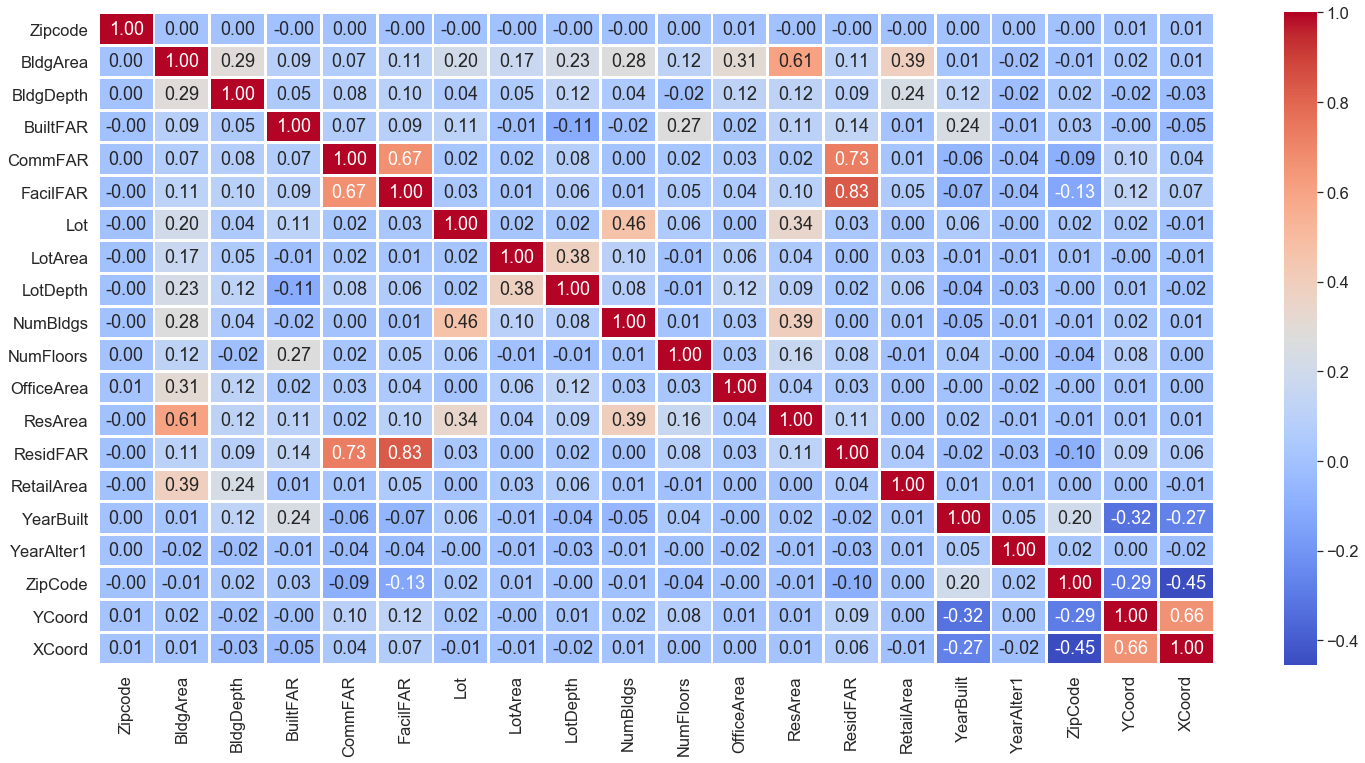

In [70]:
plt.figure(figsize=(25,12))
sns.heatmap(df5.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Treat Duplicate Values

In [71]:
df5.duplicated(keep='first').sum()

0

### Feature Engineering

In [72]:
df5['Age'] = df5['YearAlter1'] - df5['YearBuilt']

In [73]:
df5.head()

ComplaintType  Zipcode             Street        Borough  \
0              ELECTRIC  10302.0        BOND STREET  STATEN ISLAND   
1  UNSANITARY CONDITION  10307.0        MAIN STREET  STATEN ISLAND   
2               GENERAL  10304.0         CLOVE ROAD  STATEN ISLAND   
3        HEAT/HOT WATER  10309.0  BLOOMINGDALE ROAD  STATEN ISLAND   
4        HEAT/HOT WATER  10302.0        BOND STREET  STATEN ISLAND   

                 Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    135 KINGSLEY AVENUE    1504.0       34.0      0.42      1.0       1.0   
1    148 SCRANTON AVENUE    1200.0       32.0      0.43      1.0       1.0   
2   1605 HYLAN BOULEVARD    5273.0       61.0      0.34      1.0       2.4   
3      256 MELVIN AVENUE    1360.0       40.0      0.54      1.0       1.0   
4  106 GREEN VALLEY ROAD    2248.0       48.0      0.98      1.0       1.0   

   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   18   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1  301   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2   26  15500.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   31   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   62   2287.0     94.44       1.0        3.0      1915.0   2248.0       0.6   

   RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord   Age  
0      1681.0     1925.0      2005.0  10314.0  166032.0  949359.0  80.0  
1      1681.0     1965.0      2005.0  10312.0  140620.0  935993.0  40.0  
2      1681.0     1987.0      1995.0  10305.0  154073.0  959292.0   8.0  
3      1681.0     2004.0      2005.0  10314.0  153979.0  932185.0   1.0  
4      1681.0     1983.0      2005.0  10312.0  139340.0  929820.0  22.0

In [74]:
df5['Period'] = 2020 - df5['YearBuilt']

In [75]:
df5.head()

ComplaintType  Zipcode             Street        Borough  \
0              ELECTRIC  10302.0        BOND STREET  STATEN ISLAND   
1  UNSANITARY CONDITION  10307.0        MAIN STREET  STATEN ISLAND   
2               GENERAL  10304.0         CLOVE ROAD  STATEN ISLAND   
3        HEAT/HOT WATER  10309.0  BLOOMINGDALE ROAD  STATEN ISLAND   
4        HEAT/HOT WATER  10302.0        BOND STREET  STATEN ISLAND   

                 Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    135 KINGSLEY AVENUE    1504.0       34.0      0.42      1.0       1.0   
1    148 SCRANTON AVENUE    1200.0       32.0      0.43      1.0       1.0   
2   1605 HYLAN BOULEVARD    5273.0       61.0      0.34      1.0       2.4   
3      256 MELVIN AVENUE    1360.0       40.0      0.54      1.0       1.0   
4  106 GREEN VALLEY ROAD    2248.0       48.0      0.98      1.0       1.0   

   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   18   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1  301   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2   26  15500.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   31   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   62   2287.0     94.44       1.0        3.0      1915.0   2248.0       0.6   

   RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord   Age  \
0      1681.0     1925.0      2005.0  10314.0  166032.0  949359.0  80.0   
1      1681.0     1965.0      2005.0  10312.0  140620.0  935993.0  40.0   
2      1681.0     1987.0      1995.0  10305.0  154073.0  959292.0   8.0   
3      1681.0     2004.0      2005.0  10314.0  153979.0  932185.0   1.0   
4      1681.0     1983.0      2005.0  10312.0  139340.0  929820.0  22.0   

   Period  
0    95.0  
1    55.0  
2    33.0  
3    16.0  
4    37.0

### Drop unwanted features

In [76]:
df5.columns

Index(['ComplaintType', 'Zipcode', 'Street', 'Borough', 'Address', 'BldgArea',
       'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea',
       'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode',
       'YCoord', 'XCoord', 'Age', 'Period'],
      dtype='object')

In [77]:
df5.drop(['Zipcode', 'Street', 'Borough', 'Address','Lot','YearBuilt', 'YearAlter1', 
          'ZipCode','YCoord', 'XCoord'],axis=1,inplace=True)

In [78]:
df5.head()

ComplaintType  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0              ELECTRIC    1504.0       34.0      0.42      1.0       1.0   
1  UNSANITARY CONDITION    1200.0       32.0      0.43      1.0       1.0   
2               GENERAL    5273.0       61.0      0.34      1.0       2.4   
3        HEAT/HOT WATER    1360.0       40.0      0.54      1.0       1.0   
4        HEAT/HOT WATER    2248.0       48.0      0.98      1.0       1.0   

   LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2  15500.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   2287.0     94.44       1.0        3.0      1915.0   2248.0       0.6   

   RetailArea   Age  Period  
0      1681.0  80.0    95.0  
1      1681.0  40.0    55.0  
2      1681.0   8.0    33.0  
3      1681.0   1.0    16.0  
4      1681.0  22.0    37.0

### Treat Outliers

In [79]:
df5.columns

Index(['ComplaintType', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'Age', 'Period'],
      dtype='object')

In [80]:
df5.describe(include='all')

ComplaintType       BldgArea     BldgDepth      BuiltFAR  \
count            87187   87187.000000  87187.000000  87187.000000   
unique              16            NaN           NaN           NaN   
top     HEAT/HOT WATER            NaN           NaN           NaN   
freq             18206            NaN           NaN           NaN   
mean               NaN    2417.362393     40.603466      0.549554   
std                NaN   11554.776545     24.225710      0.475869   
min                NaN     100.000000      1.000000      0.010000   
25%                NaN    1280.000000     33.000000      0.350000   
50%                NaN    1600.000000     40.000000      0.490000   
75%                NaN    2132.000000     46.000000      0.610000   
max                NaN  970000.000000   5020.000000     88.550000   

             CommFAR      FacilFAR       LotArea      LotDepth      NumBldgs  \
count   87187.000000  87187.000000  8.718700e+04  87187.000000  87187.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.017724      1.047929  1.042455e+04    110.773094      1.232191   
std         0.183423      0.319004  1.928408e+05     98.512356      2.480497   
min         0.500000      1.000000  5.000000e+00      0.500000      1.000000   
25%         1.000000      1.000000  2.500000e+03     95.000000      1.000000   
50%         1.000000      1.000000  3.952000e+03    100.000000      1.000000   
75%         1.000000      1.000000  5.040000e+03    109.830000      1.000000   
max         3.400000      4.800000  3.185000e+07   5853.000000    417.000000   

           NumFloors     OfficeArea        ResArea      ResidFAR  \
count   87187.000000   87187.000000   87187.000000  87187.000000   
unique           NaN            NaN            NaN           NaN   
top              NaN            NaN            NaN           NaN   
freq             NaN            NaN            NaN           NaN   
mean        1.994045    1983.610458    1930.536410      0.601423   
std         0.751357    2959.008299    6828.639783      0.146704   
min         1.000000     120.000000     216.000000      0.500000   
25%         2.000000    1915.000000    1236.000000      0.600000   
50%         2.000000    1915.000000    1500.000000      0.600000   
75%         2.000000    1915.000000    1984.000000      0.600000   
max       114.000000  418012.000000  654030.000000      3.000000   

           RetailArea           Age        Period  
count    87187.000000  87187.000000  87187.000000  
unique            NaN           NaN           NaN  
top               NaN           NaN           NaN  
freq              NaN           NaN           NaN  
mean      1768.470907     38.804007     53.899813  
std       4369.630764     28.836874     28.864264  
min        100.000000    -55.000000      3.000000  
25%       1681.000000     17.000000     32.000000  
50%       1681.000000     35.000000     50.000000  
75%       1681.000000     55.000000     70.000000  
max     940048.000000    320.000000    355.000000

In [81]:
windsorizer = Winsorizer(distribution='skewed',tail='right',fold=3.0,
                         variables=None)

In [82]:
windsorizer.fit(df5)

Winsorizer(distribution='skewed', fold=3.0, tail='right',
           variables=['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                      'FacilFAR', 'LotArea', 'LotDepth', 'NumBldgs',
                      'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
                      'RetailArea', 'Age', 'Period'])

In [83]:
df6 = windsorizer.transform(df5)

In [84]:
df6.head()

ComplaintType  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0              ELECTRIC    1504.0       34.0      0.42      1.0       1.0   
1  UNSANITARY CONDITION    1200.0       32.0      0.43      1.0       1.0   
2               GENERAL    4688.0       61.0      0.34      1.0       1.0   
3        HEAT/HOT WATER    1360.0       40.0      0.54      1.0       1.0   
4        HEAT/HOT WATER    2248.0       48.0      0.98      1.0       1.0   

   LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2  12660.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   2287.0     94.44       1.0        2.0      1915.0   2248.0       0.6   

   RetailArea   Age  Period  
0      1681.0  80.0    95.0  
1      1681.0  40.0    55.0  
2      1681.0   8.0    33.0  
3      1681.0   1.0    16.0  
4      1681.0  22.0    37.0

In [85]:
df6.describe()

BldgArea     BldgDepth      BuiltFAR       CommFAR  FacilFAR  \
count  87187.000000  87187.000000  87187.000000  87187.000000   87187.0   
mean    1814.477915     39.994171      0.529018      0.998928       1.0   
std      816.381798     10.483170      0.275756      0.023131       0.0   
min      100.000000      1.000000      0.010000      0.500000       1.0   
25%     1280.000000     33.000000      0.350000      1.000000       1.0   
50%     1600.000000     40.000000      0.490000      1.000000       1.0   
75%     2132.000000     46.000000      0.610000      1.000000       1.0   
max     4688.000000     85.000000      1.390000      1.000000       1.0   

            LotArea      LotDepth  NumBldgs    NumFloors    OfficeArea  \
count  87187.000000  87187.000000   87187.0  87187.00000  87187.000000   
mean    4397.371030    101.937729       1.0      1.84293   1909.166734   
std     2835.382635     24.742166       0.0      0.34608     76.374475   
min        5.000000      0.500000       1.0      1.00000    120.000000   
25%     2500.000000     95.000000       1.0      2.00000   1915.000000   
50%     3952.000000    100.000000       1.0      2.00000   1915.000000   
75%     5040.000000    109.830000       1.0      2.00000   1915.000000   
max    12660.000000    154.320000       1.0      2.00000   1915.000000   

            ResArea      ResidFAR    RetailArea           Age        Period  
count  87187.000000  87187.000000  87187.000000  87187.000000  87187.000000  
mean    1681.839104      0.586015   1674.987166     38.799867     53.895099  
std      676.662613      0.034683     67.967166     28.812306     28.835551  
min      216.000000      0.500000    100.000000    -55.000000      3.000000  
25%     1236.000000      0.600000   1681.000000     17.000000     32.000000  
50%     1500.000000      0.600000   1681.000000     35.000000     50.000000  
75%     1984.000000      0.600000   1681.000000     55.000000     70.000000  
max     4228.000000      0.600000   1681.000000    169.000000    184.000000

In [86]:
windsorizer.left_tail_caps_

{}

In [87]:
windsorizer.right_tail_caps_

{'BldgArea': 4688.0,
 'BldgDepth': 85.0,
 'BuiltFAR': 1.3900000000000001,
 'CommFAR': 1.0,
 'FacilFAR': 1.0,
 'LotArea': 12660.0,
 'LotDepth': 154.32,
 'NumBldgs': 1.0,
 'NumFloors': 2.0,
 'OfficeArea': 1915.0,
 'ResArea': 4228.0,
 'ResidFAR': 0.6,
 'RetailArea': 1681.0,
 'Age': 169.0,
 'Period': 184.0}

### Predict top 5 311 Problems (HEAT/HOT WATER, PAINT/PLASTER, PLUMBING, UNSANITARY CONDITION ). Create a new category called Others

In [88]:
df6['ComplaintType'].value_counts()

HEAT/HOT WATER          18206
PLUMBING                12415
UNSANITARY CONDITION    11325
PAINT/PLASTER           10099
GENERAL CONSTRUCTION     8416
ELECTRIC                 6373
DOOR/WINDOW              4182
NONCONST                 3876
WATER LEAK               3488
FLOORING/STAIRS          2654
GENERAL                  2363
APPLIANCE                2234
SAFETY                   1239
OUTSIDE BUILDING          251
ELEVATOR                   65
STRUCTURAL                  1
Name: ComplaintType, dtype: int64

In [89]:
df6.replace(to_replace='GENERAL CONSTRUCTION',value='OTHERS',inplace=True)

In [90]:
df6.replace(to_replace='ELECTRIC',value='OTHERS',inplace=True)

In [91]:
df6.replace(to_replace='DOOR/WINDOW',value='OTHERS',inplace=True)

In [92]:
df6.replace(to_replace='WATER LEAK',value='OTHERS',inplace=True)

In [93]:
df6.replace(to_replace='NONCONST',value='OTHERS',inplace=True)

In [94]:
df6.replace(to_replace='FLOORING/STAIRS',value='OTHERS',inplace=True)

In [95]:
df6.replace(to_replace='GENERAL',value='OTHERS',inplace=True)

In [96]:
df6.replace(to_replace='APPLIANCE',value='OTHERS',inplace=True)

In [97]:
df6.replace(to_replace='SAFETY',value='OTHERS',inplace=True)

In [98]:
df6.replace(to_replace='ELEVATOR',value='OTHERS',inplace=True)

In [99]:
df6.replace(to_replace='OUTSIDE BUILDING',value='OTHERS',inplace=True)

In [100]:
df6.replace(to_replace='STRUCTURAL',value='OTHERS',inplace=True)

In [102]:
df6['ComplaintType'].value_counts()

OTHERS                  35142
HEAT/HOT WATER          18206
PLUMBING                12415
UNSANITARY CONDITION    11325
PAINT/PLASTER           10099
Name: ComplaintType, dtype: int64

In [103]:
df6.head()

ComplaintType  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0                OTHERS    1504.0       34.0      0.42      1.0       1.0   
1  UNSANITARY CONDITION    1200.0       32.0      0.43      1.0       1.0   
2                OTHERS    4688.0       61.0      0.34      1.0       1.0   
3        HEAT/HOT WATER    1360.0       40.0      0.54      1.0       1.0   
4        HEAT/HOT WATER    2248.0       48.0      0.98      1.0       1.0   

   LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   3600.0     90.00       1.0        2.0      1915.0   1504.0       0.5   
1   2821.0     90.00       1.0        2.0      1915.0   1200.0       0.6   
2  12660.0    107.67       1.0        1.0      1915.0   1500.0       0.6   
3   2500.0    100.00       1.0        2.0      1915.0   1360.0       0.6   
4   2287.0     94.44       1.0        2.0      1915.0   2248.0       0.6   

   RetailArea   Age  Period  
0      1681.0  80.0    95.0  
1      1681.0  40.0    55.0  
2      1681.0   8.0    33.0  
3      1681.0   1.0    16.0  
4      1681.0  22.0    37.0

In [104]:
encoder = LabelEncoder()

In [105]:
df6['ComplaintType'] = encoder.fit_transform(df6['ComplaintType'])

In [106]:
df6['ComplaintType'].value_counts()

1    35142
0    18206
3    12415
4    11325
2    10099
Name: ComplaintType, dtype: int64

In [107]:
df6.head()

ComplaintType  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  LotArea  \
0              1    1504.0       34.0      0.42      1.0       1.0   3600.0   
1              4    1200.0       32.0      0.43      1.0       1.0   2821.0   
2              1    4688.0       61.0      0.34      1.0       1.0  12660.0   
3              0    1360.0       40.0      0.54      1.0       1.0   2500.0   
4              0    2248.0       48.0      0.98      1.0       1.0   2287.0   

   LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  RetailArea  \
0     90.00       1.0        2.0      1915.0   1504.0       0.5      1681.0   
1     90.00       1.0        2.0      1915.0   1200.0       0.6      1681.0   
2    107.67       1.0        1.0      1915.0   1500.0       0.6      1681.0   
3    100.00       1.0        2.0      1915.0   1360.0       0.6      1681.0   
4     94.44       1.0        2.0      1915.0   2248.0       0.6      1681.0   

    Age  Period  
0  80.0    95.0  
1  40.0    55.0  
2   8.0    33.0  
3   1.0    16.0  
4  22.0    37.0

### HEAT/HOT WATER = 0; OTHERS = 1; PAINT/PLASTER = 2; PLUMBING = 3; UNSANITARY CONDITION = 4

In [108]:
df6.columns

Index(['ComplaintType', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'Age', 'Period'],
      dtype='object')

In [109]:
df6 = df6[['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'Age', 'Period','ComplaintType']]

### Create and save processed dataset

In [110]:
#df6.to_csv("statenclasstrain.csv",index=False)